# Week 5 weekly activity
Koay Li Wei, 17ACB01900

In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

1. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:

In [17]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img = cv.imread(img)
    img_copy = img.copy()
    cv.imshow('patched image', img_copy)
    
    height, width = img.shape[:2]

    M, N = int(height/num_horizontal_patches), int(width/num_vertical_patches)

    x1, y1 = 0, 0

    for y in range(0, height, M):
        for x in range(0, width, N):
            if (height - y) < M or (width - x) < N:
                break
            
            y1 = y + M   
            x1 = x + N
        
            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
                tile1 = img[y:height, x:width]
                cv.imshow('tile', tile1)
          
            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
                
            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
        
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
                
num_horizontal_patches = 2
num_vertical_patches = 3
crop_grid('dog.jfif',num_horizontal_patches , num_vertical_patches, 'red')
cv.waitKey(0)
cv.destroyAllWindows()

2. Display image sequences of smooth transition of two images with different values of 
α
. Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.


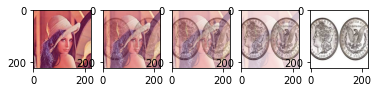

In [26]:
img1 = cv.imread('lena.jfif')
img2 = cv.imread('coins.jfif')

# resize img2
new_shape = img1.shape[:2]
img2 = cv.resize(img2, new_shape)

# blending
dst1 = cv.addWeighted(img1, 1.0, img2, 0.0, 0)
dst2 = cv.addWeighted(img1, 0.75, img2, 0.25, 0)
dst3 = cv.addWeighted(img1, 0.5, img2, 0.5, 0)
dst4 = cv.addWeighted(img1, 0.25, img2, 0.75, 0)
dst5 = cv.addWeighted(img1, 0.0, img2, 1.0, 0)

# show
cv.imshow('blended image', dst3)

plt.subplot(1,5,1)
dst1 = cv.cvtColor(dst1, cv.COLOR_BGR2RGB) 
plt.imshow(dst1)

plt.subplot(1,5,2)
dst2 = cv.cvtColor(dst2, cv.COLOR_BGR2RGB) 
plt.imshow(dst2)

plt.subplot(1,5,3)
dst3 = cv.cvtColor(dst3, cv.COLOR_BGR2RGB) 
plt.imshow(dst3)

plt.subplot(1,5,4)
dst4 = cv.cvtColor(dst4, cv.COLOR_BGR2RGB) 
plt.imshow(dst4)

plt.subplot(1,5,5)
dst5 = cv.cvtColor(dst5, cv.COLOR_BGR2RGB) 
plt.imshow(dst5)

plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

3. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
Use external libraries imutils.
Modify the transformation matrix.

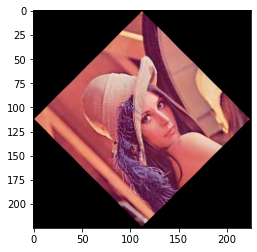

In [30]:
#transformation matrix method
img_lena = cv.imread('lena.jfif')
rows, cols = img_lena.shape[:2]
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 45, 0.7)
rotate1 = cv.warpAffine(img_lena, M, (cols, rows))

#cv.imshow('rotated_image', dst)
rotate1 = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.imshow(rotate1)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

In [31]:
!pip install imutils

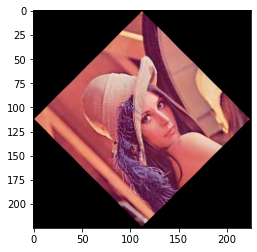

In [35]:
#by using imutils libraries
import imutils
img_lena = cv.imread('lena.jfif')
rotate2 = imutils.rotate_bound(img_lena, 45)

#cv.imshow('rotated_image', rotate)
rotate2 = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.imshow(rotate2)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

4. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:

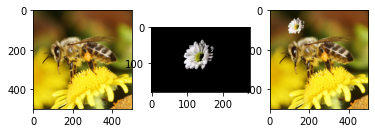

In [27]:
img_flower = cv.imread('flower.jfif')
flower_gray = cv.cvtColor(img_flower, cv.COLOR_BGR2GRAY)
img_bee = cv.imread('native-bee.png')

# segmentation - flower
ret, th1 = cv.threshold(flower_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
flower_segmented = cv.bitwise_and(img_flower, img_flower, mask = th1)

# scale up 
M = np.float32([[1, 0, 0], [0, 1, 0]])
flower_segmented_enlarged = cv.warpAffine(flower_segmented, M, (500, 500))

# merging 
merged = cv.bitwise_or(flower_segmented_enlarged, img_bee)

# show
cv.imshow('Flower and bee', merged)

plt.subplot(1,3,1)
img_bee = cv.cvtColor(img_bee, cv.COLOR_BGR2RGB)
plt.imshow(img_bee)

plt.subplot(1,3,2)
flower_segmented = cv.cvtColor(flower_segmented, cv.COLOR_BGR2RGB)
plt.imshow(flower_segmented)

plt.subplot(1,3,3)
merged = cv.cvtColor(merged, cv.COLOR_BGR2RGB)
plt.imshow(merged)

plt.show()
cv.waitKey(0)
cv.destroyAllWindows()